In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.impute import SimpleImputer

In [ ]:
all_postcode_data = pd.read_csv('.../ALS/static_data_patient_postcode.csv')
statistic_data = pd.read_csv('.../ALS/static_data_all.csv')
len(np.unique(statistic_data['CODICE']))

In [ ]:
print(len(np.unique(all_postcode_data['CODICE'])))
print(len(np.unique(all_postcode_data['POSCODE'])))

In [ ]:
dir = os.getcwd() # Getting the current path
if not os.path.exists(os.path.join(dir,'plots')):
    os.mkdir('plots') # Making a folder called 'plots' in the current directory
plot_dir = os.path.join(dir, 'plots')  # Making the 'plots' folder path and changing the current directory
plot_dir

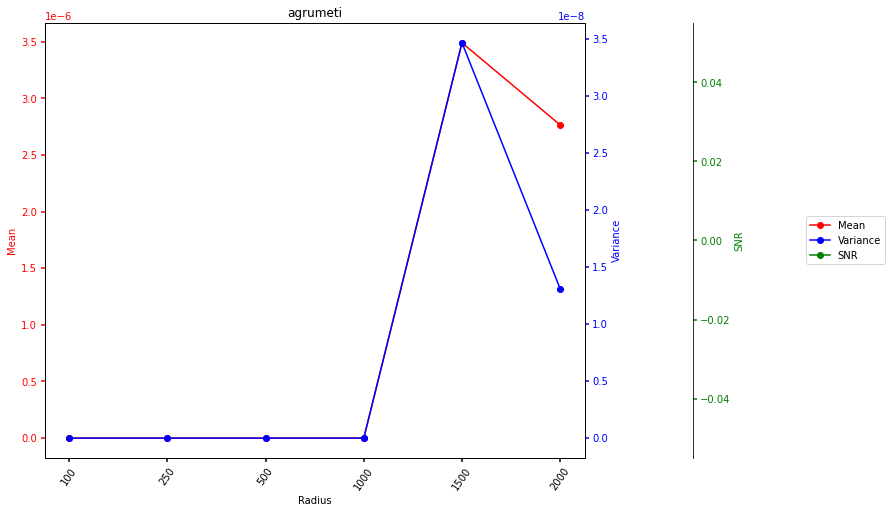

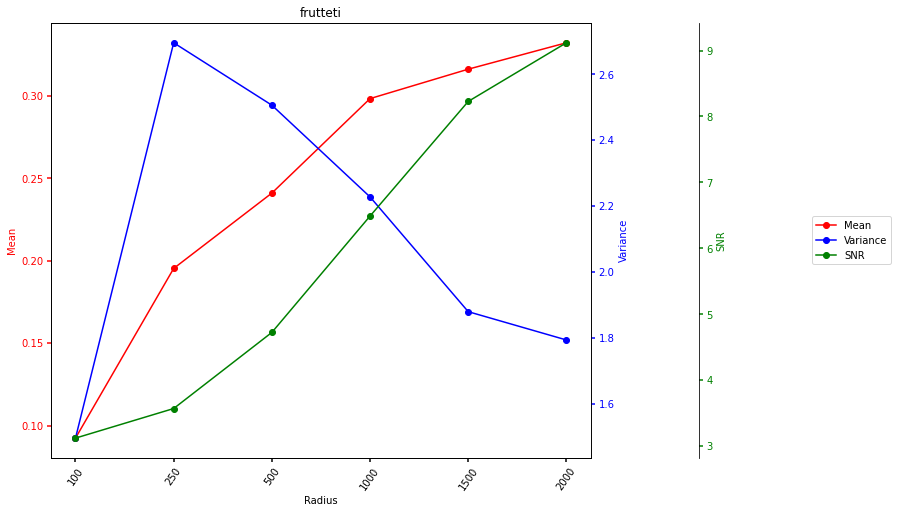

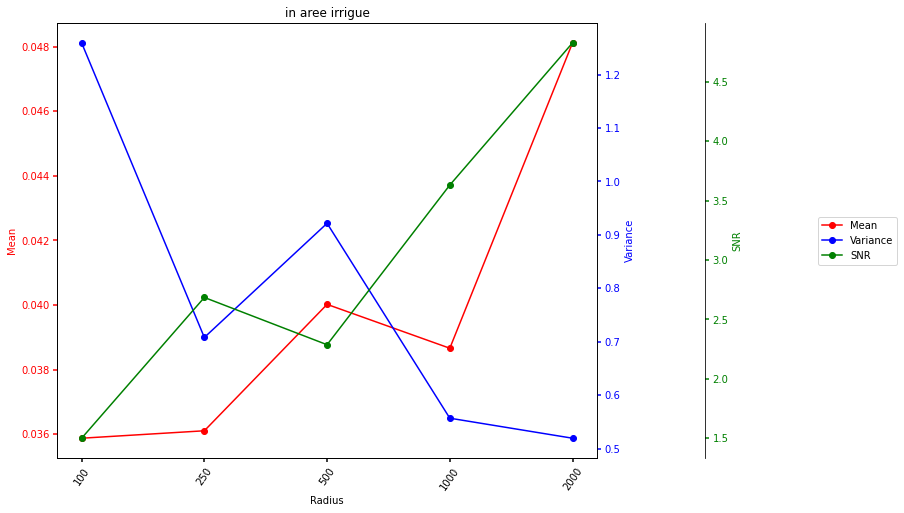

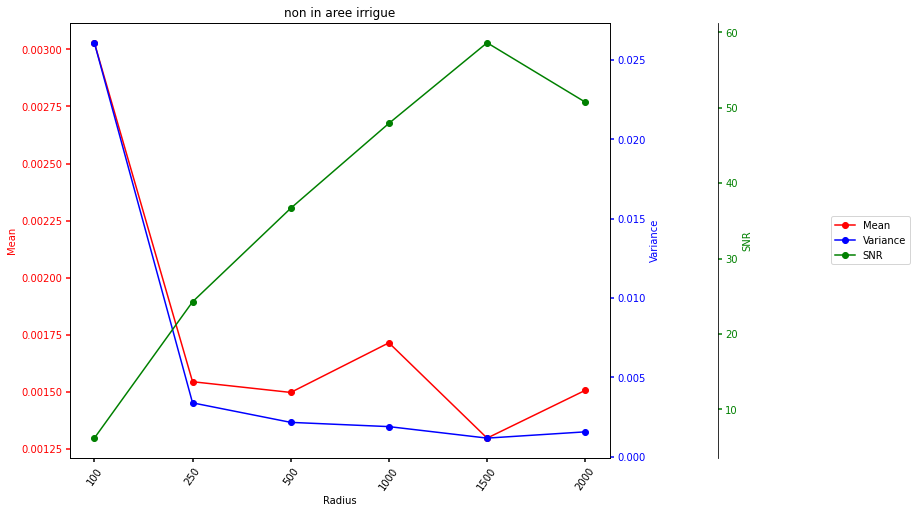

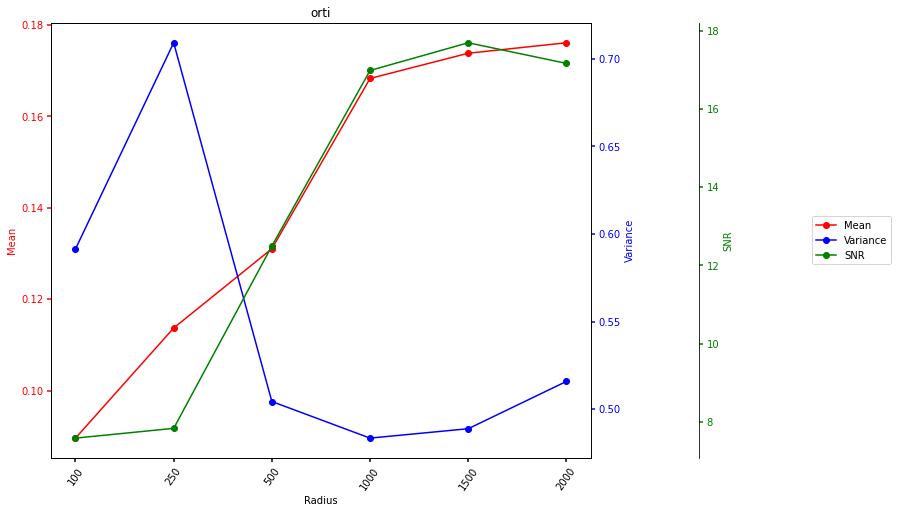

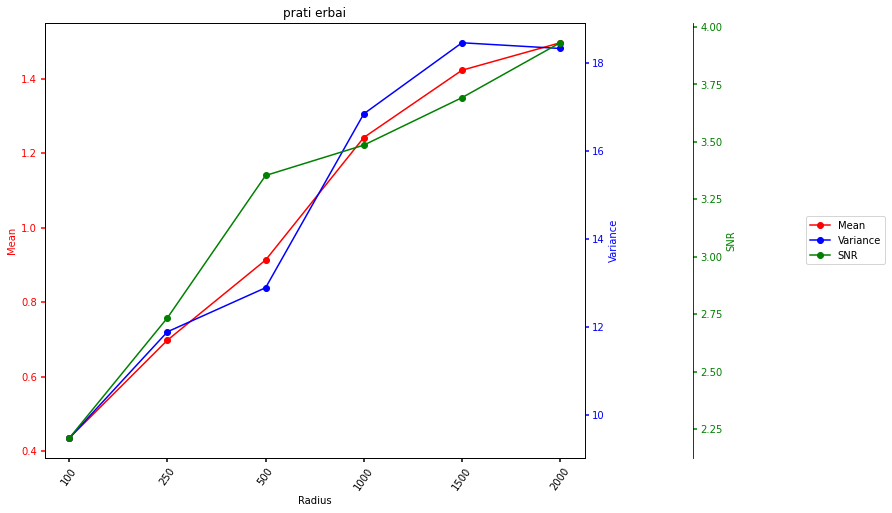

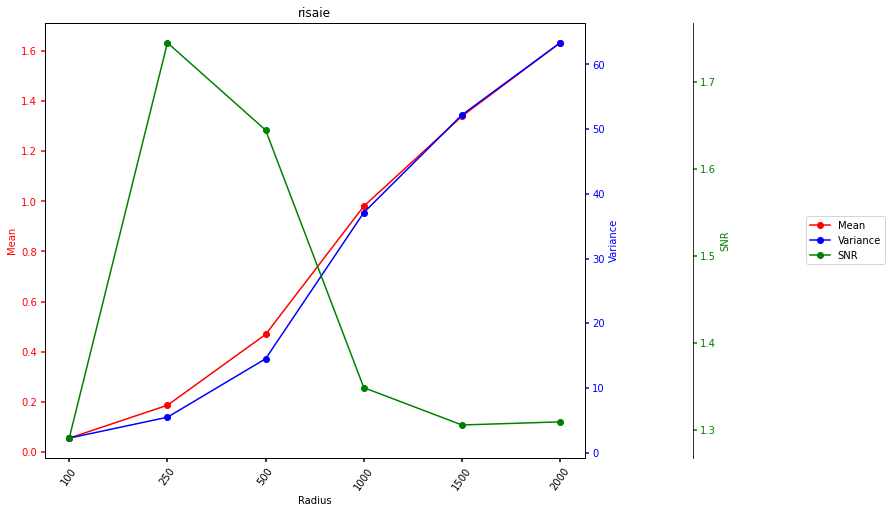

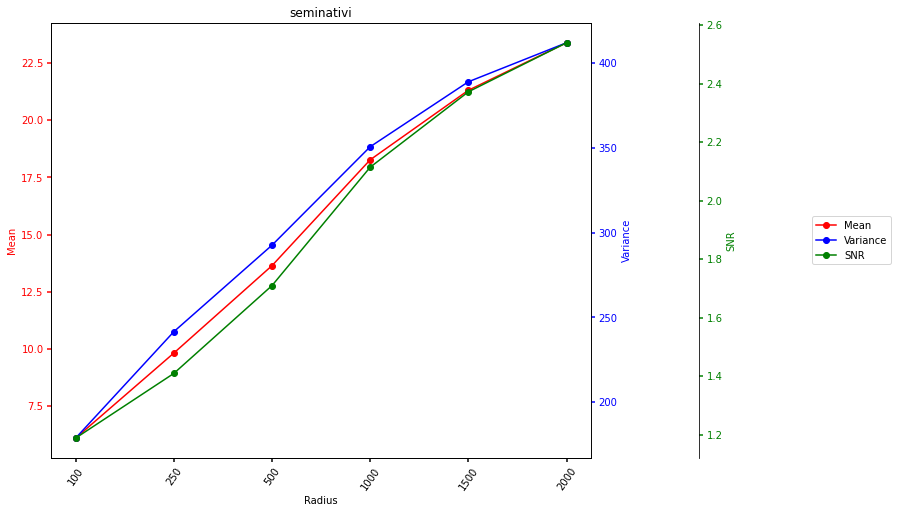

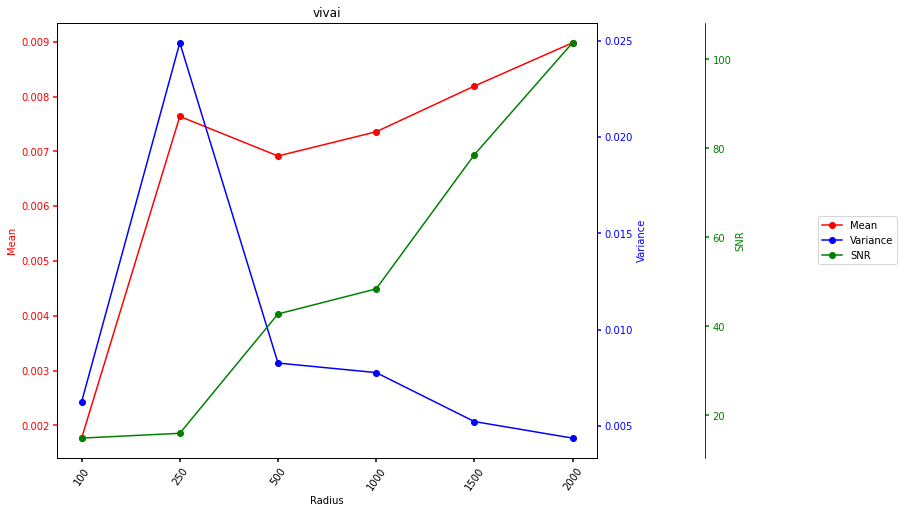

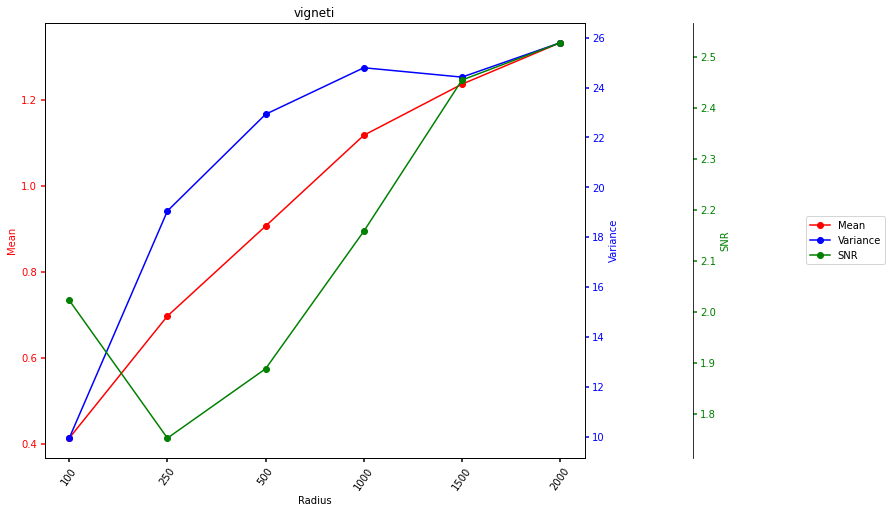

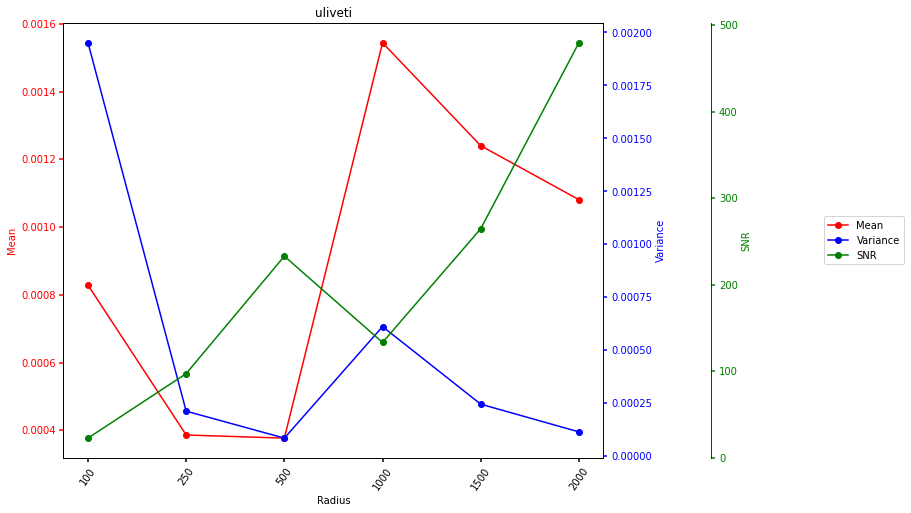

In [ ]:
features = [parameter.replace('percentuale_score_', '').replace('_100', '') for parameter in statistic_data.columns if parameter.endswith('100')]
for feature in features:
  col_names = [name for name in statistic_data.columns if f'percentuale_score_{feature}' in name] # Selecting the different radiuses for each feature
  radiuses = [int(radius.replace(f'percentuale_score_{feature}_','')) for radius in col_names if feature in radius]
  postcode_names = np.unique(all_postcode_data['POSCODE'])

  postcode_radius = pd.DataFrame(columns = col_names, index=postcode_names)
  for pc in postcode_names:
    postcode = all_postcode_data[all_postcode_data['POSCODE']==pc] # Selecting all codice with the same postcode
    merged_data = pd.merge(postcode,statistic_data,how = 'inner', left_on=['CODICE'], right_on = ['CODICE']) # Selecting the statistical data for specific postcode

    data_statistic = statistic_data[col_names] # selected data from all statistic data
    data_postcode = merged_data[col_names] # selected data for each postcode

    mean_value = data_statistic.mean() # Mean for each feature
    var_value_postcode = data_postcode.var() # Variance for each postcode (for a group of codices(patients))
    var_value_statistic = data_statistic.var() # variance for all codices (for all postcodes)

    SNR = mean_value / ((var_value_postcode + var_value_statistic)/ np.sqrt(data_statistic.shape[0])) # SNR for each radius per each postcode
    postcode_radius.loc[pc] = SNR.to_list()

  # postcode_radius = postcode_radius.T
  # imp_zero = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
  # imp_zero = imp_zero.fit(postcode_radius)
  # postcode_radius = imp_zero.transform(postcode_radius)
  # postcode_radius = postcode_radius.T
  # postcode_radius = pd.DataFrame(postcode_radius, columns = new_col_name, index =postcode_names)

  new_col_name = [name.replace('percentuale_score','SNR') for name in col_names ]
  postcode_radius.columns = new_col_name
  # postcode_radius.reset_index(names = 'POSCODE', inplace = True)
  postcode_radius.dropna(axis = 0, inplace = True)
  postcode_radius.to_csv(f'SNR_{feature}.csv', index = False)

  mean_value = data_statistic.mean()
  var_value =  data_statistic.var()
  mean_SNR = postcode_radius.mean()

  fig, ax = plt.subplots(figsize = (12,8))
  fig.subplots_adjust(right=0.75)

  twin1 = ax.twinx()
  twin2 = ax.twinx()

  twin2.spines.right.set_position(("axes", 1.2))

  xlabel_radius = [str(label) for label in radiuses]
  p1, = ax.plot(xlabel_radius, mean_value, color="red", marker="o", label = 'Mean')
  p2, = twin1.plot(xlabel_radius, var_value, color="blue", marker="o", label = 'Variance')
  p3, = twin2.plot(xlabel_radius, mean_SNR, color="green", marker="o", label = 'SNR')

  ax.set_xlabel("Radius")
  ax.set_ylabel("Mean")
  ax.set_title(f"{feature.replace('_', ' ')}")
  twin1.set_ylabel("Variance")
  twin2.set_ylabel("SNR")

  ax.yaxis.label.set_color(p1.get_color())
  twin1.yaxis.label.set_color(p2.get_color())
  twin2.yaxis.label.set_color(p3.get_color())

  tkw = dict(size=4, width=1.5)
  ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
  # ax.xaxis.set_ticks(np.arange(radiuses[0], radiuses[-1]+1, 250))
  ax.tick_params(axis='x', rotation=55)
  twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
  twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
  ax.tick_params(axis='x', **tkw)

  ax.legend(handles=[p1, p2, p3], loc='center left', bbox_to_anchor=(1.40, 0.5))
  plt.show()
  fig.savefig(f'{feature}.png', dpi=100, bbox_inches='tight')

In [ ]:
radiuses

In [ ]:
for pc in np.unique(all_postcode_data['POSCODE']):
  postcode = all_postcode_data[all_postcode_data['POSCODE']==pc] # Selecting all codice with the same postcode
  merged_data = pd.merge(postcode,statistic_data,how = 'inner', left_on=['CODICE'], right_on = ['CODICE']) # Selecting the statistical data for specific postcode
  features = [parameter.replace('percentuale_score_', '').replace('_100', '') for parameter in merged_data.columns if parameter.endswith('100')] # Selecting the name of features
  for feature in features:
    col_names = [name for name in merged_data.columns if f'percentuale_score_{feature}' in name] # Selecting the different radiuses for each feature
    radiuses = [int(radius.replace(f'percentuale_score_{feature}_','')) for radius in col_names if feature in radius]

    data_statistic = statistic_data[col_names] # selected data from all statistic data
    data_postcode = merged_data[col_names] # selected data for each postcode

    mean_value = data_statistic.mean() # Mean for each feature
    var_value_postcode = data_postcode.var() # Variance for each postcode (for a group of codices(patients))
    var_value_statistic = data_statistic.var() # variance for all codices (for all postcodes)

    SNR = mean_value / ((var_value_postcode + var_value_statistic)/ np.sqrt(data_statistic.shape[0])) # SNR for each radius per each postcode

    # Making a dataframe with postcode in row and radius in column to store SNR
    postcode_radius = pd.DataFrame(columns = col_names, index=[np.unique(all_postcode_data['POSCODE'])])
    postcode_radius.loc[pc] = SNR.to_list()


In [ ]:
result = mean_value / ((var_value_postcode + var_value_statistic) / 53.32)
result

In [ ]:
empty_df = pd.DataFrame(columns = ['CODICE', 'POSCODE', 'Feature','Radius','Value'])
mergedata = pd.merge(all_postcode_data,statistic_data,how = 'inner', left_on=['CODICE'], right_on = ['CODICE'])
mergedata.head()

In [ ]:
postcode_radius = pd.DataFrame(columns = [np.unique(all_postcode_data['POSCODE'])], index=radiuses)
postcode_radius

In [ ]:
    # SNR_1 = stats.signaltonoise(data_postcode, axis=0, ddof=0)
    # if not os.path.exists(os.path.join(plot_dir, feature)):
    #   os.makedirs(os.path.join(plot_dir, feature))

    # fig, ax = plt.subplots(3,1,figsize=(12, 8), sharey = True)
    # ax[0].plot(radiuses, mean_value, label='Mean')
    # ax[0].set_ylabel('Mean')
    # ax[0].set_title(f"Mean for {feature.replace('_',' ')}")
    # ax[0].legend()

    # ax[1].plot(radiuses, var_value_statistic, label='Variance')
    # ax[1].set_title(f"Variance for {feature.replace('_',' ')}")
    # ax[1].set_xlabel('Radious')
    # ax[1].set_ylabel('Variance')
    # ax[1].legend()


    # ax[2].plot(radiuses, SNR, label='SNR')
    # ax[2].set_title(f"SNR for {feature.replace('_',' ')}")
    # ax[2].set_xlabel('Radious')
    # ax[2].set_ylabel('SNR')
    # ax[2].legend()
    # ax[2].xaxis.set_ticks(np.arange(radiuses[0], radiuses[-1]+1, 200))

    # plt.savefig(os.path.join(plot_dir, feature)+'.png')

    # # data.insert(0, column = 'CODICE', value = merged_data['CODICE'])
    # # data.insert(1, column = 'POSCODE', value = merged_data['POSCODE'])
    # # data = data + merged_data['CODICE','POSCODE']

In [ ]:
  data = merged_data[col_names]
  data.insert(0, column = 'CODICE', value = merged_data['CODICE'])
  data.insert(1, column = 'POSCODE', value = merged_data['POSCODE'])

In [ ]:
radiuses = [int(radius.replace(f'percentuale_score_{feature}_','')) for radius in col_names if feature in radius]
postcode_radius = pd.DataFrame(columns = [radiuses])
postcode_radius.head()